In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Function

In [2]:
def train_test_split(X, y, test_size=0.20, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_samples = int(len(X) * test_size)

    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [3]:
def k_fold_cross_validation(X, y, model, k=5):
    n = len(X)
    fold_size = n // k
    scores = []
    for i in range(k):
        # Split data into training and validation sets
        start = i * fold_size
        end = min((i + 1) * fold_size, n)
        X_test = X[start:end]
        y_test = y[start:end]

        X_train = np.concatenate([X[:start], X[end:]], axis=0)
        y_train = np.concatenate([y[:start], y[end:]], axis=0)
        model.fit(X_train, y_train)
        # Evaluate the model on the validation data
        score = model.score(X_test, y_test)
        scores.append(score)

    return scores

In [18]:
class KNNClassifier:
    def __init__(self, n_neighbors=5, p=2):
        self.n_neighbors = n_neighbors
        self.p = p

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            x_test = np.array(x_test)
            
            distances = np.power(np.sum(np.power(np.abs(self.X_train - x_test), self.p), axis=1), 1/self.p)

            k_neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            neighbor_labels = [self.y_train[i] for i in k_neighbors_indices]  
            prediction = np.bincount(neighbor_labels).argmax()
            predictions.append(prediction)

        return np.array(predictions)
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        accuracy = np.sum(predictions == y_test) / len(y_test)
        return accuracy


## Coding

In [5]:
df = pd.read_csv('waterQuality1.csv')
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [6]:
df.dtypes

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

C:\Users\Thapdecha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


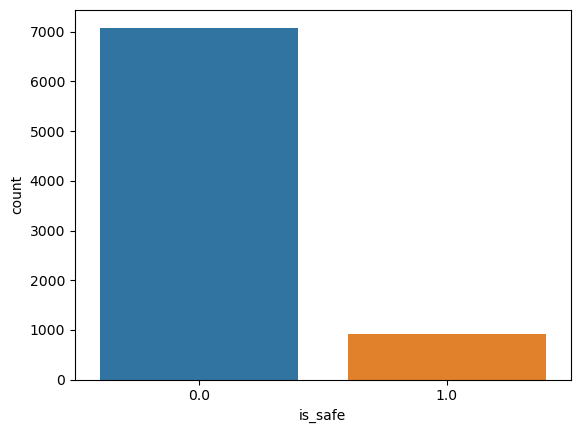

In [8]:
sns.countplot('is_safe',data = df)
plt.show()

In [7]:
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')
df['is_safe'] = pd.to_numeric(df['is_safe'], errors='coerce')

In [9]:
x = np.array(df.drop(['is_safe'], axis=1))
y = np.array(df['is_safe'])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
# Convert training data to float
x_train = [[float(value) for value in sample] for sample in x_train]
y_train = [float(label) for label in y_train]

# Convert test data to float
x_test = [[float(value) for value in sample] for sample in x_test]
y_test = [float(label) for label in y_test]

## Euclidean Distance

In [12]:
model_euclidean = KNNClassifier(n_neighbors=5, p=2) #Euclidean distance
model_euclidean.fit(x_train, y_train)
model_euclidean.score(x_test,y_test)

0.8586616635397123

In [13]:
n_neighbors_list = list(range(1, 25, 2))  # List of values for n_neighbors
accuracy_scores = []

for n_neighbors in n_neighbors_list:
    knn_classifier = KNNClassifier(n_neighbors=n_neighbors, p=2)
    knn_classifier.fit(x_train, y_train)
    accuracy = knn_classifier.score(x_test,y_test)
    accuracy_scores.append(accuracy)

# Find the highest accuracy and its corresponding n_neighbors value
max_accuracy = max(accuracy_scores)
best_n_neighbors = n_neighbors_list[accuracy_scores.index(max_accuracy)]

print("Highest Accuracy:", max_accuracy)
print("Corresponding k value (n_neighbors):", best_n_neighbors)

Highest Accuracy: 0.8736710444027517
Corresponding k value (n_neighbors): 21


In [14]:
model_euclidean = KNNClassifier(n_neighbors=21, p=2)
scores = k_fold_cross_validation(x, y, model_euclidean, k=5)
print("Cross-validation scores:", scores)
print("Average score:", np.mean(scores))

Cross-validation scores: [0.5766103814884302, 0.8524077548467792, 0.9443402126328956, 0.9687304565353346, 0.991869918699187]
Average score: 0.8667917448405253


## Manhatton Distance

In [15]:
model_manhattan = KNNClassifier(n_neighbors=5, p=1) #Manhattan distance
model_manhattan.fit(x_train, y_train)
model_manhattan.score(x_test,y_test)

0.8730456535334584

In [16]:
n_neighbors_list = list(range(1, 25, 2))  # List of values for n_neighbors
accuracy_scores = []

for n_neighbors in n_neighbors_list:
    knn_classifier = KNNClassifier(n_neighbors=n_neighbors, p=1)
    knn_classifier.fit(x_train, y_train)
    accuracy = knn_classifier.score(x_test,y_test)
    accuracy_scores.append(accuracy)

# Find the highest accuracy and its corresponding n_neighbors value
max_accuracy = max(accuracy_scores)
best_n_neighbors = n_neighbors_list[accuracy_scores.index(max_accuracy)]

print("Highest Accuracy:", max_accuracy)
print("Corresponding k value (n_neighbors):", best_n_neighbors)

Highest Accuracy: 0.8761726078799249
Corresponding k value (n_neighbors): 13


In [17]:
model_manhattan = KNNClassifier(n_neighbors=13, p=1)
scores = k_fold_cross_validation(x, y, model_manhattan, k=5)
print("Cross-validation scores:", scores)
print("Average score:", np.mean(scores))

Cross-validation scores: [0.5766103814884302, 0.8248905565978737, 0.9449656035021888, 0.9687304565353346, 0.991869918699187]
Average score: 0.8614133833646029
